In [1]:
import yfinance as yf
import numpy as np

In [2]:
data = yf.download("SPY META", start="2015-01-01", end="2022-01-11")

[*********************100%***********************]  2 of 2 completed


In [3]:
closes = data['Adj Close']
spy_returns = closes.SPY.pct_change().dropna()
meta_returns = closes.META.pct_change().dropna()

### Sharpe Ratio

In [4]:
def sharpe_ratio(returns, adjustment_factor=0.0):
    """
    Determines the Sharpe ratio of a strategy.
    
    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
    adjustment_factor : int, float
        Constant daily benchmark return throughout the period.

    Returns
    -------
    sharpe_ratio : float

    Note
    -----
    See https://en.wikipedia.org/wiki/Sharpe_ratio for more details.
    """
    returns_risk_adj = returns - adjustment_factor
    return (
        returns_risk_adj.mean() / returns_risk_adj.std()
    ) * np.sqrt(252)

In [5]:
sharpe_ratio(meta_returns)

0.8077800057428559

In [6]:
sharpe_ratio(spy_returns)

0.8535648472772195

<AxesSubplot:xlabel='Date'>

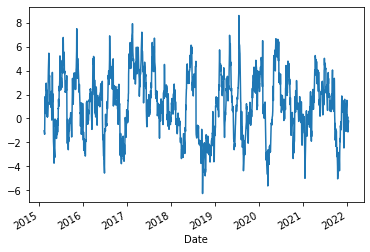

In [7]:
meta_returns.rolling(30).apply(sharpe_ratio).plot()

<AxesSubplot:xlabel='Date'>

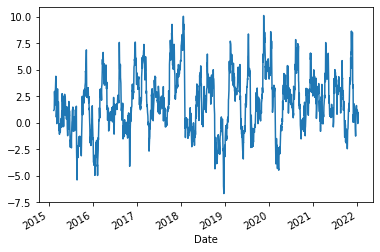

In [8]:
spy_returns.rolling(30).apply(sharpe_ratio).plot()

<AxesSubplot:>

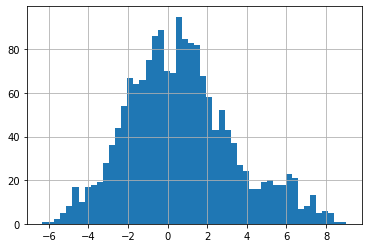

In [9]:
(spy_returns.rolling(30).apply(sharpe_ratio)
- meta_returns.rolling(30).apply(sharpe_ratio)).hist(bins=50)

### Omega Ratio

In [10]:
def omega_ratio(returns, required_return=0.0):
    """Determines the Omega ratio of a strategy.
    
    Parameters
    ----------
    returns : pd.Series or np.ndarray
    Daily returns of the strategy, noncumulative.
    required_return : float, optional
    Minimum acceptance return of the investor. Threshold over which to
    consider positive vs negative returns. It will be converted to a
    value appropriate for the period of the returns. E.g. An annual minimum
    acceptable return of 100 will translate to a minimum acceptable
    return of 0.018.

    Returns
    -------
    omega_ratio : float

    Note
    -----
    See <https://en.wikipedia.org/wiki/Omega_ratio> for more details.
    """
    
    return_threshold = (1 + required_return) ** (1 / 252) - 1
    
    returns_less_thresh = returns - return_threshold
    
    numer = sum(returns_less_thresh[returns_less_thresh > 0.0])
    denom = -1.0 * sum(returns_less_thresh[returns_less_thresh < 0.0])
    
    if denom > 0.0:
        return numer / denom
    else:
        return np.nan

<AxesSubplot:>

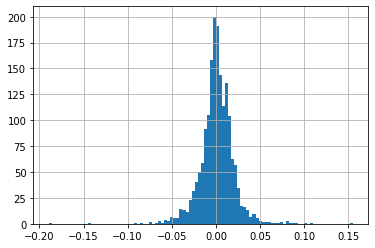

In [11]:
meta_returns.hist(bins=100)

In [12]:
meta_returns.skew()

-0.288333865597152

In [13]:
meta_returns.kurtosis()

10.811859435696949

In [14]:
omega_ratio(meta_returns, 0.15)

1.0701803793382978

### Sortino Ratio

In [15]:
def sortino_ratio(returns, adjustment_factor=0.0):
    """
    Determines the Sortino ratio of a strategy.
    
    Parameters
    ----------
    returns : pd.Series or np.ndarray
        Daily returns of the strategy, noncumulative.
        adjustment_factor : int, float
        Constant daily benchmark return throughout the period.

    Returns
    -------
    sortino_ratio : float

    Note
    -----
    See `<https://www.sunrisecapital.com/wp-content/uploads/2014/06/Futures_
    Mag_Sortino_0213.pdf>`__ for more details.
    """
    
    # compute annualized return
    returns_risk_adj = np.asanyarray(returns - adjustment_factor)
    mean_annual_return = returns_risk_adj.mean() * 252

    # compute the downside deviation
    downside_diff = np.clip(returns_risk_adj, np.NINF, 0)
    np.square(downside_diff, out=downside_diff)
    annualized_downside_deviation = np.sqrt(downside_diff.mean()) * np.sqrt(252)
    
    return mean_annual_return / annualized_downside_deviation

In [16]:
sortino_ratio(spy_returns)

1.1819978658945964

In [17]:
sortino_ratio(meta_returns)

1.1638170904731098

<AxesSubplot:xlabel='Date'>

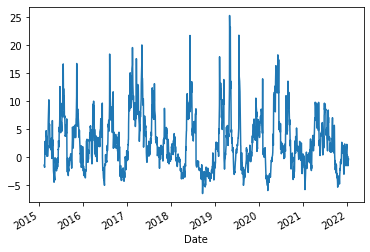

In [18]:
meta_returns.rolling(30).apply(sortino_ratio).plot()

<AxesSubplot:xlabel='Date'>

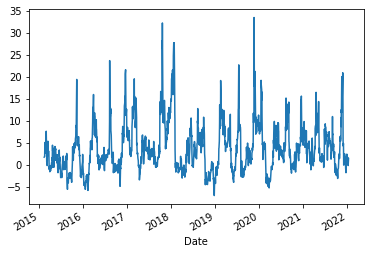

In [19]:
spy_returns.rolling(30).apply(sortino_ratio).plot()

<AxesSubplot:>

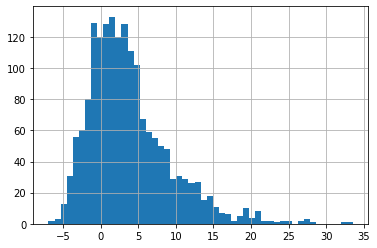

In [20]:
spy_returns.rolling(30).apply(sortino_ratio).hist(bins=50)

<AxesSubplot:>

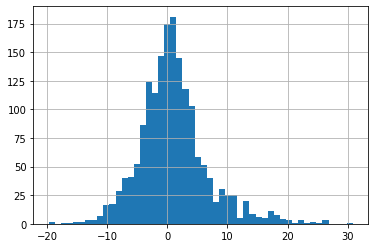

In [21]:
(
    spy_returns.rolling(30).apply(sortino_ratio)
    - meta_returns.rolling(30).apply(sortino_ratio)
).hist(bins=50)